### Exploratory Data Analysis (EDA) Using Python (Jupyter Notebook)

https://www.youtube.com/watch?v=5NcbVYhQJvw

Dataset https://www.kaggle.com/ljanjughazyan/cars1

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# define woring directory
os.chdir('C:/master/Dataset')

In [3]:
# import dataset
cars = pd.read_csv('CARS.csv')

In [4]:
# top five obs
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [5]:
#data info
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [6]:
# drop unimportant variables
drop_cols = ['MSRP','Invoice','MPG_Highway']
cars = cars.drop(drop_cols, axis=1)
cars.rename({'MPG_City':'MPG'}, axis=1, inplace=True)

In [7]:
# display after drop
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Make        428 non-null    object 
 1   Model       428 non-null    object 
 2   Type        428 non-null    object 
 3   Origin      428 non-null    object 
 4   DriveTrain  428 non-null    object 
 5   EngineSize  428 non-null    float64
 6   Cylinders   426 non-null    float64
 7   Horsepower  428 non-null    int64  
 8   MPG         428 non-null    int64  
 9   Weight      428 non-null    int64  
 10  Wheelbase   428 non-null    int64  
 11  Length      428 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 40.2+ KB


In [8]:
# drop duplicate rows - if any
cars = cars.drop_duplicates(keep='first')

In [9]:
# shape of data
cars.shape

(428, 12)

In [10]:
# summary statistics
cars.describe()

,EngineSize,Cylinders,Horsepower,MPG,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,7190.000000,144.000000,238.000000


In [11]:
cars_sort = cars.sort_values(by='MPG', ascending = False).head()
cars_sort.head()

,Make,Model,Type,Origin,DriveTrain,EngineSize,Cylinders,Horsepower,MPG,Weight,Wheelbase,Length
150,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,2.0,3.0,73,60,1850,95,155
373,Toyota,Prius 4dr (gas/electric),Hybrid,Asia,Front,1.5,4.0,110,59,2890,106,175
149,Honda,Civic Hybrid 4dr manual (gas/electric),Hybrid,Asia,Front,1.4,4.0,93,46,2732,103,175
404,Volkswagen,Jetta GLS TDI 4dr,Sedan,Europe,Front,1.9,4.0,100,38,3003,99,172
155,Honda,Civic HX 2dr,Sedan,Asia,Front,1.7,4.0,117,36,2500,103,175


In [12]:
def min_max_values(col):
    '''the function takes the column name as the argument
    and returns the top & bottom observation in that dataframe'''
    
    top = cars[col].idxmax()
    top_obs = pd.DataFrame(cars.loc[top])
    
    bottom = cars[col].idxmin()
    bot_obs = pd.DataFrame(cars.loc[bottom])
    
    min_max_obs = pd.concat([top_obs,bot_obs],axis=1)
    
    return min_max_obs

In [13]:
min_max_values('MPG')

,150,118
Make,Honda,Ford
Model,Insight 2dr (gas/electric),Excursion 6.8 XLT
Type,Hybrid,SUV
Origin,Asia,USA
DriveTrain,Front,All
EngineSize,2,6.8
Cylinders,3,10
Horsepower,73,310
MPG,60,10
Weight,1850,7190


(array([ 31., 195., 142.,  44.,   9.,   4.,   0.,   1.,   0.,   2.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 <BarContainer object of 10 artists>)

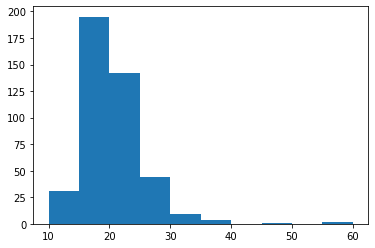

In [14]:
# histogram of continuous numerical variable
num_bins=10
plt.hist(cars['MPG'],num_bins)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MPG', ylabel='Density'>

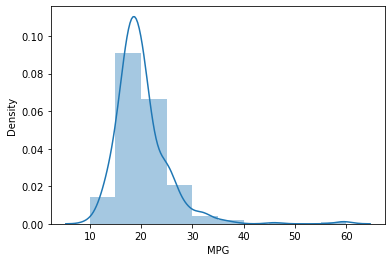

In [15]:
# pdfs
sns.distplot(cars['MPG'],bins=10)

(array([  3.,  17.,  35., 100., 120.,  78.,  51.,  13.,   9.,   2.]),
 array([143. , 152.5, 162. , 171.5, 181. , 190.5, 200. , 209.5, 219. ,
        228.5, 238. ]),
 <BarContainer object of 10 artists>)

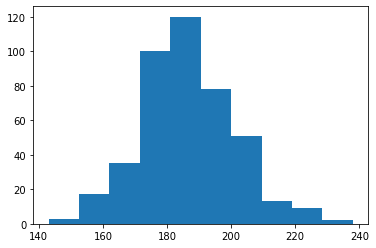

In [16]:
num_bins=10
plt.hist(cars['Length'],num_bins)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

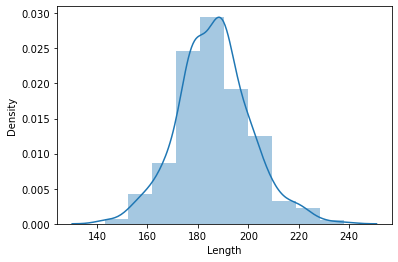

In [17]:
sns.distplot(cars['Length'],bins=10)

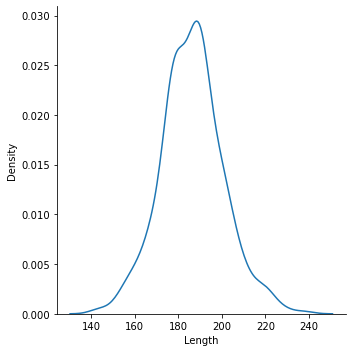

In [18]:
sns.displot(cars["Length"],kind="kde")

In [19]:
# count by category - cross tabulate
make_dist = cars.groupby('Make').size()
make_dist

Make
Acura             7
Audi             19
BMW              20
Buick             9
Cadillac          8
Chevrolet        27
Chrysler         15
Dodge            13
Ford             23
GMC               8
Honda            17
Hummer            1
Hyundai          12
Infiniti          8
Isuzu             2
Jaguar           12
Jeep              3
Kia              11
Land Rover        3
Lexus            11
Lincoln           9
MINI              2
Mazda            11
Mercedes-Benz    26
Mercury           9
Mitsubishi       13
Nissan           17
Oldsmobile        3
Pontiac          11
Porsche           7
Saab              7
Saturn            8
Scion             2
Subaru           11
Suzuki            8
Toyota           28
Volkswagen       15
Volvo            12
dtype: int64

<AxesSubplot:title={'center':'Make distribution'}, xlabel='Make'>

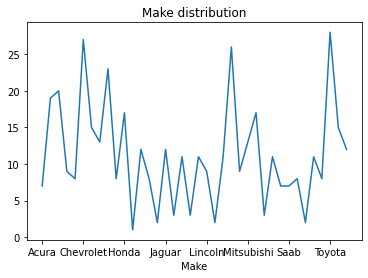

In [20]:
# Distribution of Categorical variable
make_dist.plot(title="Make distribution")

In [21]:
# select all numerical variables
cars_num = cars.select_dtypes(include=['float64','int64'])
cars_num.head()

,EngineSize,Cylinders,Horsepower,MPG,Weight,Wheelbase,Length
0,3.5,6.0,265,17,4451,106,189
1,2.0,4.0,200,24,2778,101,172
2,2.4,4.0,200,22,3230,105,183
3,3.2,6.0,270,20,3575,108,186
4,3.5,6.0,225,18,3880,115,197


array([[<AxesSubplot:title={'center':'EngineSize'}>,
        <AxesSubplot:title={'center':'Cylinders'}>,
        <AxesSubplot:title={'center':'Horsepower'}>],
       [<AxesSubplot:title={'center':'MPG'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Wheelbase'}>],
       [<AxesSubplot:title={'center':'Length'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

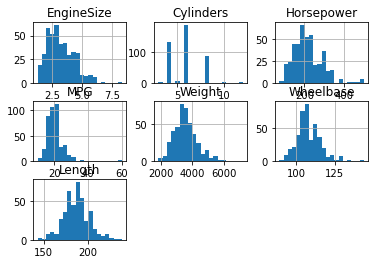

In [22]:
cars_num.hist(bins=20)

In [23]:
# pairwise correlation of all numeric columns
cars_corr = cars_num.corr()
cars_corr

,EngineSize,Cylinders,Horsepower,MPG,Weight,Wheelbase,Length
EngineSize,1.000000,0.908002,0.787435,-0.709471,0.807867,0.636517,0.637448
Cylinders,0.908002,1.000000,0.810341,-0.684402,0.742209,0.546730,0.547783
Horsepower,0.787435,0.810341,1.000000,-0.676699,0.630796,0.387398,0.381554
MPG,-0.709471,-0.684402,-0.676699,1.000000,-0.737966,-0.507284,-0.501526
Weight,0.807867,0.742209,0.630796,-0.737966,1.000000,0.760703,0.690021
Wheelbase,0.636517,0.546730,0.387398,-0.507284,0.760703,1.000000,0.889195
Length,0.637448,0.547783,0.381554,-0.501526,0.690021,0.889195,1.000000


In [24]:
# correlation of variable of interest ('MPG') with the other columns
cars_corr = cars_num.corr()['MPG']
cars_corr

EngineSize   -0.709471
Cylinders    -0.684402
Horsepower   -0.676699
MPG           1.000000
Weight       -0.737966
Wheelbase    -0.507284
Length       -0.501526
Name: MPG, dtype: float64

In [25]:
# correlation of variable of interest ('MPG') with the other columns excluding last column
cars_corr = cars_num.corr()['MPG'][:-1]
cars_corr

EngineSize   -0.709471
Cylinders    -0.684402
Horsepower   -0.676699
MPG           1.000000
Weight       -0.737966
Wheelbase    -0.507284
Name: MPG, dtype: float64

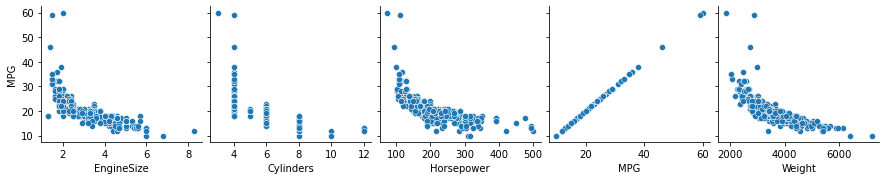

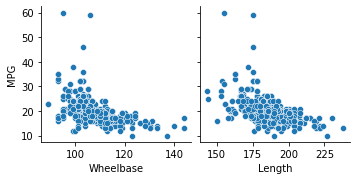

In [26]:
for i in range(0,len(cars_num.columns),5):
    sns.pairplot(cars_num, y_vars=['MPG'], x_vars=cars_num.columns[i:i+5],diag_kind = None)

In [27]:
corr = cars_num.drop('MPG', axis=1).corr()
corr

,EngineSize,Cylinders,Horsepower,Weight,Wheelbase,Length
EngineSize,1.000000,0.908002,0.787435,0.807867,0.636517,0.637448
Cylinders,0.908002,1.000000,0.810341,0.742209,0.546730,0.547783
Horsepower,0.787435,0.810341,1.000000,0.630796,0.387398,0.381554
Weight,0.807867,0.742209,0.630796,1.000000,0.760703,0.690021
Wheelbase,0.636517,0.546730,0.387398,0.760703,1.000000,0.889195
Length,0.637448,0.547783,0.381554,0.690021,0.889195,1.000000


In [28]:
corr[(corr>=0.5)|(corr<=-0.4)]

,EngineSize,Cylinders,Horsepower,Weight,Wheelbase,Length
EngineSize,1.000000,0.908002,0.787435,0.807867,0.636517,0.637448
Cylinders,0.908002,1.000000,0.810341,0.742209,0.546730,0.547783
Horsepower,0.787435,0.810341,1.000000,0.630796,NaN,NaN
Weight,0.807867,0.742209,0.630796,1.000000,0.760703,0.690021
Wheelbase,0.636517,0.546730,NaN,0.760703,1.000000,0.889195
Length,0.637448,0.547783,NaN,0.690021,0.889195,1.000000


<AxesSubplot:>

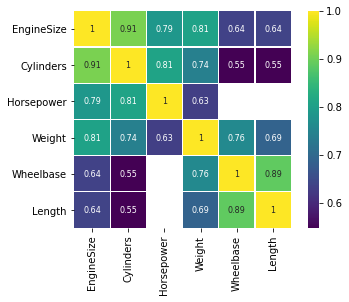

In [29]:
# plotting significant correlation in one plot (heatmap)
sns.heatmap(corr[(corr>=0.5)|(corr<=-0.4)],
           cmap='viridis',vmax=1.0,linewidth=0.1,
           annot=True, annot_kws={"size":8},square=True)

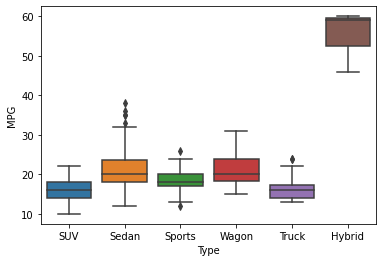

In [30]:
# box-plot (categorical variable)
box1 = sns.boxplot(x='Type', y='MPG', data=cars)

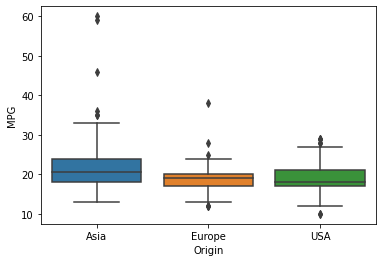

In [31]:
box2 = sns.boxplot(x='Origin', y='MPG', data=cars)

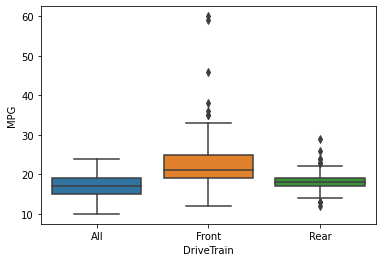

In [32]:
box3 = sns.boxplot(x='DriveTrain', y='MPG', data=cars)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Length', ylabel='MPG'>

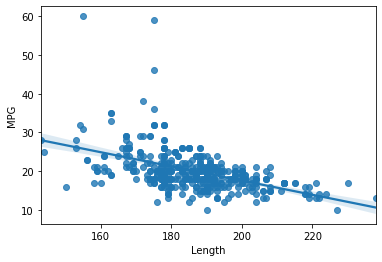

In [33]:
# regression plot
sns.regplot(cars['Length'], cars['MPG'])